### Importing the libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data:

In [3]:
train_data=pd.read_csv(r"C:\Users\soleh\Downloads\MS-EXCEL Sheets\PP11.csv")
test_data= pd.read_csv(r"C:\Users\soleh\Downloads\MS-EXCEL Sheets\hr_test.csv")

In [4]:
train_data.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [5]:
train_data.shape

(54808, 14)

In [6]:
test_data.shape

(23490, 13)

### Descriptive statistics

In [7]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
test_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [9]:
#Check for null values:
train_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
test_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


### Data Exploration

In [12]:
train_data['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

Data is imbalanced as most of the emoloyee's not promoted

<Axes: xlabel='is_promoted', ylabel='count'>

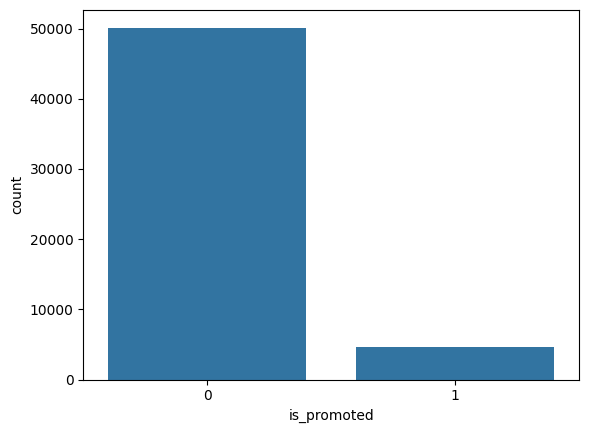

In [13]:
sns.countplot(x = 'is_promoted', data = train_data ,)

In [14]:
train_data.education.value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

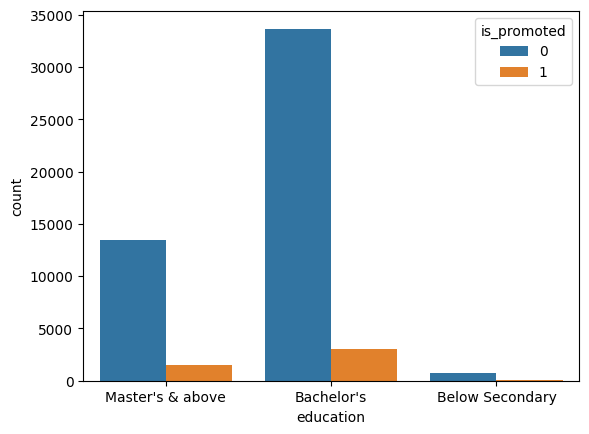

In [15]:
sns.countplot(x = 'education',data=train_data,hue='is_promoted')

<Axes: xlabel='gender', ylabel='count'>

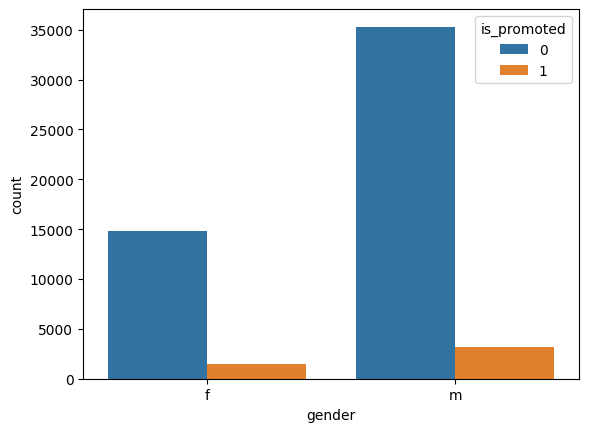

In [16]:
sns.countplot(x = 'gender',data=train_data,hue='is_promoted')

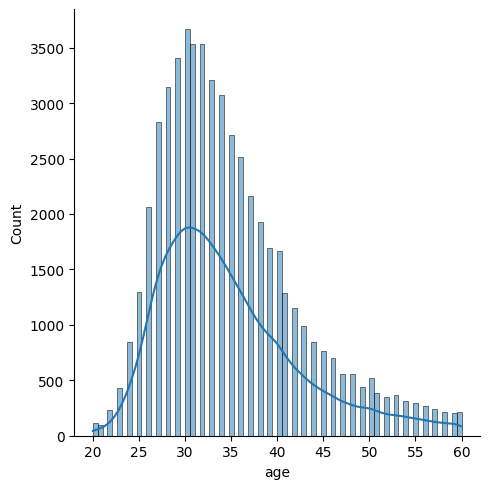

In [17]:
sns.displot(train_data['age'],kde=True)#kernal density estimation

plot is rightly_skewed positive graph

<Axes: xlabel='previous_year_rating', ylabel='count'>

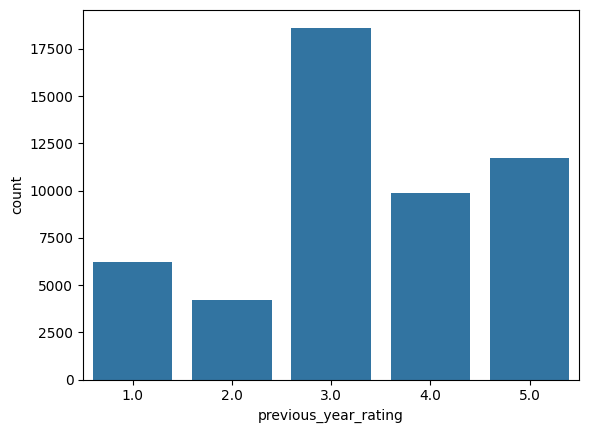

In [18]:
sns.countplot(x=train_data['previous_year_rating'],data=train_data)

<Axes: xlabel='department', ylabel='count'>

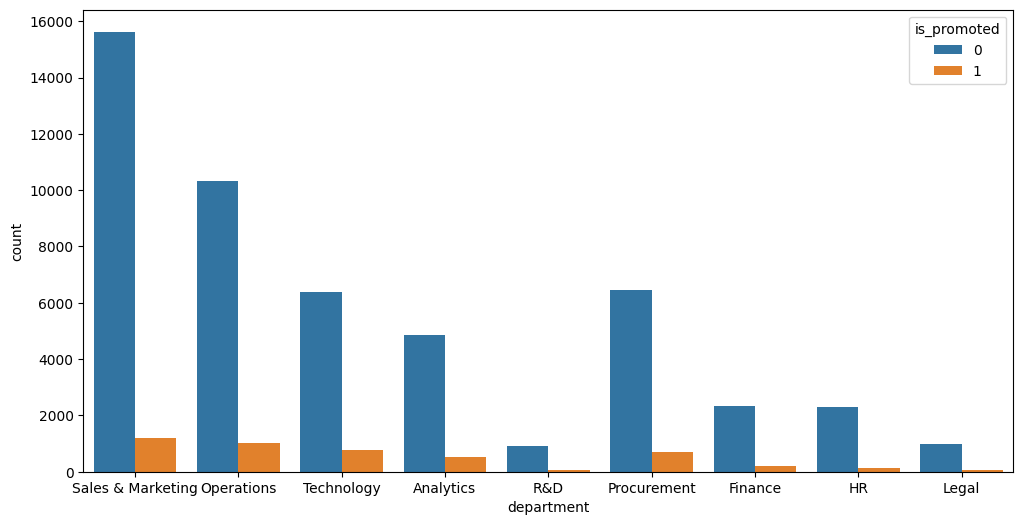

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'department',data= train_data,hue='is_promoted')

<Axes: xlabel='recruitment_channel', ylabel='count'>

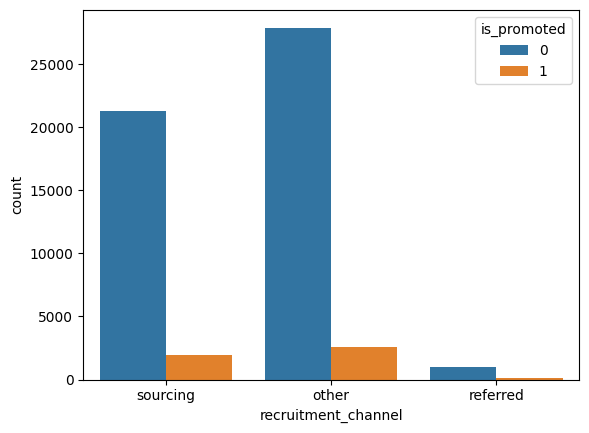

In [20]:
sns.countplot(x = 'recruitment_channel',data=train_data,hue= 'is_promoted')

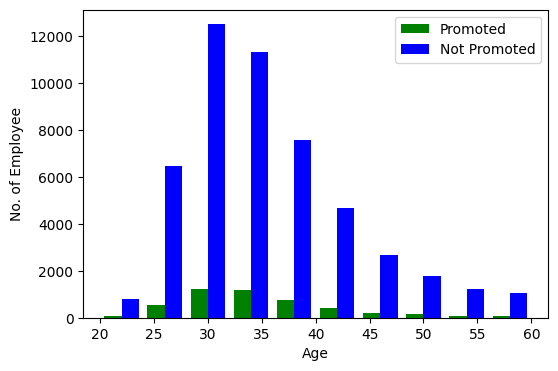

In [21]:
figure = plt.figure(figsize=(6,4))
plt.hist([train_data[train_data['is_promoted']==1]['age'],
          train_data[train_data['is_promoted']==0]['age']],
         color=['g','b'],
         bins = 10,label=['Promoted','Not Promoted'])
plt.xlabel('Age')
plt.ylabel('No. of Employee')
plt.legend()

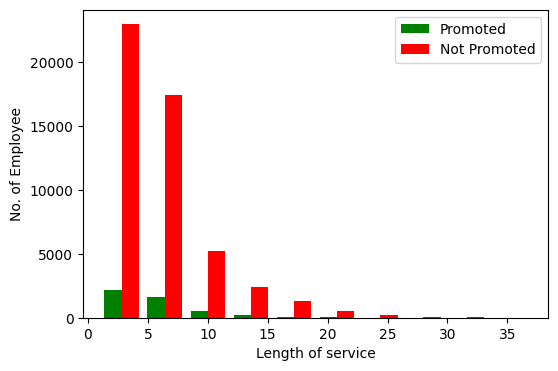

In [22]:
figure = plt.figure(figsize=(6,4))
plt.hist([train_data[train_data['is_promoted']==1]['length_of_service'],
          train_data[train_data['is_promoted']==0]['length_of_service']],
         color=['g','r'],
         bins = 10,label=['Promoted','Not Promoted'])
plt.xlabel('Length of service')
plt.ylabel('No. of Employee')
plt.legend()

<Axes: xlabel='age', ylabel='length_of_service'>

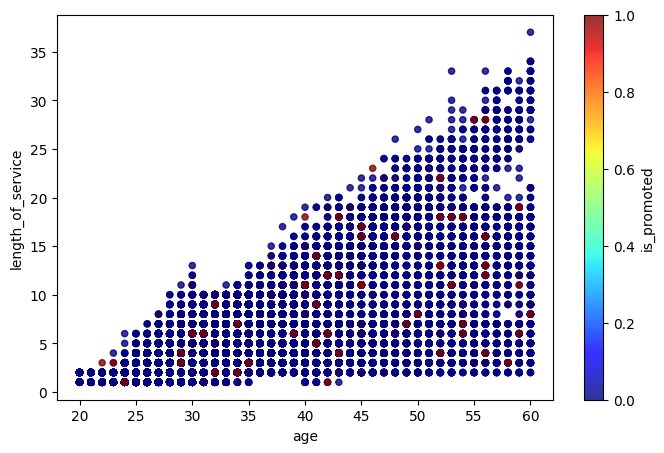

In [23]:
train_data.plot.scatter('age','length_of_service',c = 'is_promoted',
                        colormap='jet',alpha=0.8,figsize=(8,5))

<Axes: xlabel='awards_won?', ylabel='count'>

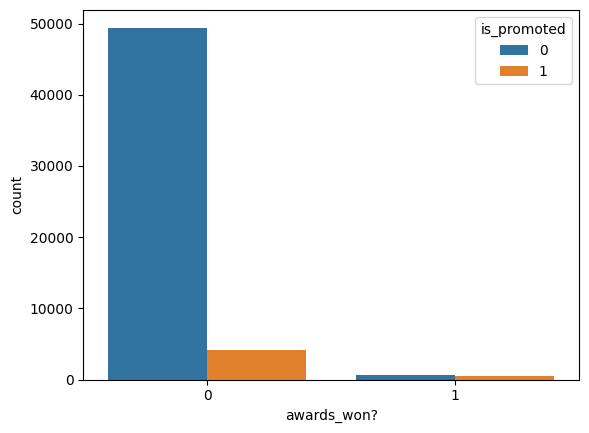

In [24]:
sns.countplot(x = 'awards_won?', data = train_data,hue = 'is_promoted')

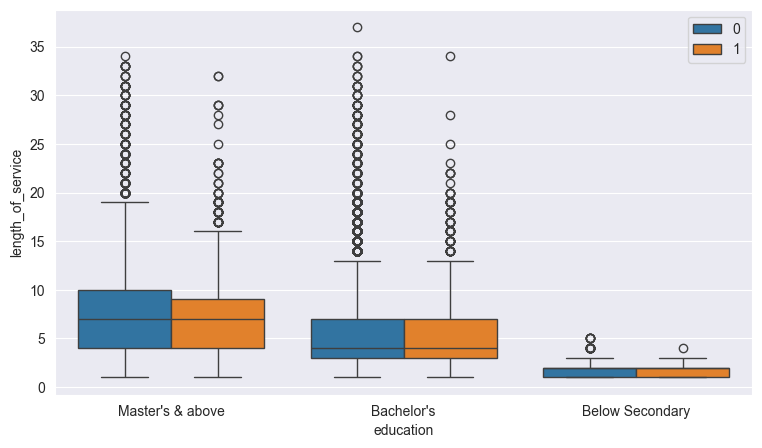

In [25]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
sns.boxplot(x='education',y='length_of_service',data=train_data,hue='is_promoted')
plt.legend(loc=0)

<Axes: xlabel='education', ylabel='length_of_service'>

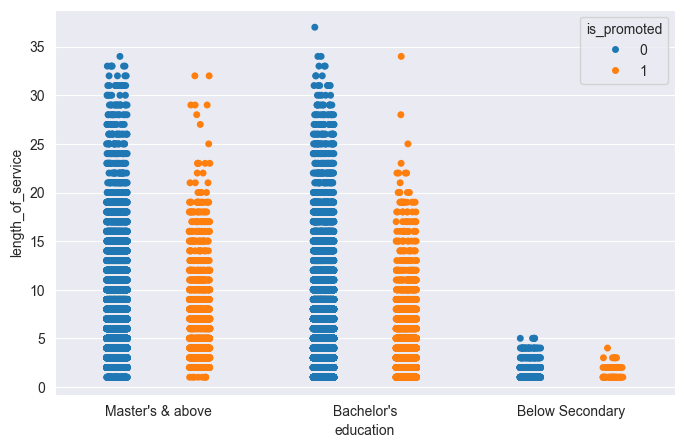

In [26]:
plt.figure(figsize=(8,5))
sns.stripplot(x='education',y = 'length_of_service',data= train_data,jitter=True,hue='is_promoted',dodge=True)
           

### Missing values

In [27]:
train_data['education'].fillna("Bachelor's",inplace=True)
test_data['education'].fillna("Bachelor's",inplace=True)

C:\Users\soleh\AppData\Local\Temp\ipykernel_15536\2255178454.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['education'].fillna("Bachelor's",inplace=True)
C:\Users\soleh\AppData\Local\Temp\ipykernel_15536\2255178454.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [28]:
train_data['previous_year_rating'].skew()

-0.3106378431385327

Numerical data so checked skewness which is negative hence using medain for NA value imputation

In [29]:
train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median(),inplace=True)

C:\Users\soleh\AppData\Local\Temp\ipykernel_15536\368697610.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median(),inplace=True)


In [30]:
test_data['previous_year_rating'].fillna(test_data['previous_year_rating'].median(),inplace=True)

C:\Users\soleh\AppData\Local\Temp\ipykernel_15536\3055590629.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['previous_year_rating'].fillna(test_data['previous_year_rating'].median(),inplace=True)


In [31]:
train_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [32]:
test_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

We have five attributes which are categorical or string type,label conversion is used

In [33]:
from sklearn.preprocessing import LabelEncoder    #for gender:M=1,F=0
lbl_enco = LabelEncoder()

In [35]:
train_data['department'] = lbl_enco.fit_transform(train_data['department'])
test_data['department'] = lbl_enco.fit_transform(test_data['department'])
train_data['gender'] = lbl_enco.fit_transform(train_data['gender'])
test_data['gender'] = lbl_enco.fit_transform(test_data['gender'])
train_data['education'] = lbl_enco.fit_transform(train_data['education'])
test_data['education'] = lbl_enco.fit_transform(test_data['education'])
train_data['recruitment_channel'] = lbl_enco.fit_transform(train_data['recruitment_channel'])
test_data['recruitment_channel'] = lbl_enco.fit_transform(test_data['recruitment_channel'])

In [36]:
train_data.drop( labels = 'employee_id',axis=1,inplace=True)
train_data.drop(labels='region',axis=1,inplace=True)
test_data.drop(labels='region',axis=1,inplace=True)

In [37]:
train_data.head(3)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,2,0,2,1,35,5.0,8,1,0,49,0
1,4,0,1,0,1,30,5.0,4,0,0,60,0
2,7,0,1,2,1,34,3.0,7,0,0,50,0


### Correlation:

In [38]:
train_data.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [39]:
rel_features =['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score']

In [40]:
rel_features_corr = train_data.corr()['is_promoted'][['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score']]

In [41]:
rel_features_corr

department              0.000130
education               0.029257
gender                 -0.011109
recruitment_channel     0.002229
no_of_trainings        -0.024896
age                    -0.017166
previous_year_rating    0.153230
length_of_service      -0.010670
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
Name: is_promoted, dtype: float64

Here KPI's, award's won & avg_training_score attributes have positive correlation thus having high impact on target variable('is_promoted')

<Axes: >

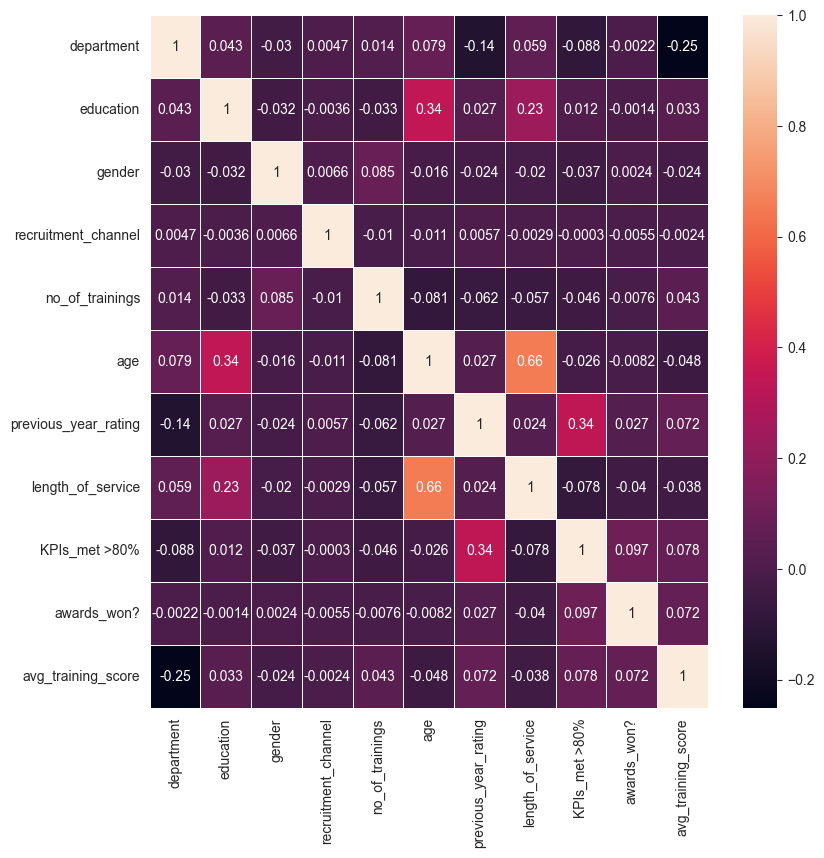

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(train_data[rel_features].corr(),annot = True, linewidths = 0.5)

#### Splitting the data

In [43]:
x= train_data[rel_features]
y = train_data['is_promoted']

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

### XGBoost

In [45]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier(n_estimators=200,
max_depth=10,
min_child_weight=5,
gamma=0,
subsample=0.5,
objective='binary:logistic',
nthreads = 5,
scale_pos_weight =13,
reg_lambda=5,
alpha=5,
base_score=0.15,
random_state=45)
clf_xgb.fit(x_train,y_train)

C:\Users\soleh\anaconda3\envs\notebook\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:37:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "nthreads" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=5, base_score=0.15, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, nthreads=5, ...)

In [46]:
#Predicting test set results:
xg_pred = clf_xgb.predict(x_test).astype(int)

In [47]:
#Evaluate Predictions:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix,confusion_matrix(y_test,xg_pred))
print(classification_report,classification_report(y_test,xg_pred))
print("Accuracy:",accuracy_score(y_test,xg_pred))


<function confusion_matrix at 0x000002139736B600> [[8961 1080]
 [ 383  538]]
<function classification_report at 0x00000213973849A0>               precision    recall  f1-score   support

           0       0.96      0.89      0.92     10041
           1       0.33      0.58      0.42       921

    accuracy                           0.87     10962
   macro avg       0.65      0.74      0.67     10962
weighted avg       0.91      0.87      0.88     10962

Accuracy: 0.8665389527458492


## Random Forest

In [48]:
#The problem is classification one :Importing Random Forest model:
from sklearn.ensemble import RandomForestClassifier
Parameters = {'bootstrap':False,
              'min_samples_leaf':3,
              'n_estimators':500,
              'min_samples_split':10,
              'max_features':'sqrt',
              'max_depth':10
             }
#Create Random forest classifier with 100 trees
clf_rf = RandomForestClassifier(**Parameters)
#Training the model
clf_rf.fit(x_train,y_train)

rf_pred=clf_rf.predict(x_test).astype(int)

In [49]:
print(confusion_matrix,confusion_matrix(y_test,rf_pred))
print(classification_report,classification_report(y_test,rf_pred))
print("Accuracy:",accuracy_score(y_test,rf_pred))

<function confusion_matrix at 0x000002139736B600> [[10025    16]
 [  750   171]]
<function classification_report at 0x00000213973849A0>               precision    recall  f1-score   support

           0       0.93      1.00      0.96     10041
           1       0.91      0.19      0.31       921

    accuracy                           0.93     10962
   macro avg       0.92      0.59      0.64     10962
weighted avg       0.93      0.93      0.91     10962

Accuracy: 0.930122240467068


Accuracy is not a good parameter for classification models, here focus is on recall or f1-score to make it close to 1.0

In [50]:
from sklearn.metrics import recall_score
recall_score(y_test,rf_pred)

0.18566775244299674

In [51]:
rf_pred = clf_rf.predict(test_data[rel_features]).astype(int)
sub=pd.DataFrame()
sub ['employee_id'] = test_data['employee_id']
sub['is_promoted'] =rf_pred
# sub[['employee_id','is_promoted']].to_csv('submission_rf.csv',index=False)|| To save prediction in a csv.

In [52]:
sub.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [53]:
sub.shape

(23490, 2)

In [54]:
sub.is_promoted.value_counts()

is_promoted
0    23156
1      334
Name: count, dtype: int64

Count for 1 is too low w.r.t total observations which implies model is negatively trained.

## GBM(GradientBoostingModel)

In [ ]:
from sklearn import ensemble
gbm = ensemble.GradientBoostingClassifier(n_estimators =500,max_depth =10,
                                         learning_rate=0.1)
gbm.fit(x_train,y_train)

In [ ]:
gbm_prediction=gbm.predict(x_test)

In [ ]:
#Evaluate Predictions:
gbm_prediction = gbm.predict(test_data[rel_features]).astype(int)
sub=pd.DataFrame()
sub ['employee_id'] = test_data['employee_id']
sub['is_promoted'] =gbm_prediction

In [ ]:
sub.is_promoted.value_counts()

Different Model Predictions for 0's and 1's :

##   XGBooster(XGB) --------------- RandomForest(RF) --------------GradientBoosting(GBM)

###    0-______1______________________________0_____________1 ____________________________________0________________1

#### 10041______921________________________________23154__________336___________________________________________22269_______________1221